In [1]:
# Load libraries
import pandas
import numpy as np
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn import tree

# Load dataset
url = "adult_PPnoFS.csv"
df = pandas.read_csv(url)
print(df.shape)
print(df.head(20))

c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(48842, 15)
    age  workclass  fnlwgt  education  educational-num  marital-status  \
0    25          3  226802          1                7               4   
1    38          3   89814         11                9               2   
2    28          1  336951          7               12               2   
3    44          3  160323         15               10               2   
4    18          3  103497         15               10               4   
5    34          3  198693          0                6               4   
6    29          3  227026         11                9               4   
7    63          5  104626         14               15               2   
8    24          3  369667         15               10               4   
9    55          3  104996          5                4               2   
10   65          3  184454         11                9               2   
11   36          0  212465          9               13               2   
12   26          3   82091

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

X = df.values[:, :14]
y = df.values[:,14]


X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = svm.SVC(kernel='rbf',decision_function_shape='ovr',max_iter=9000)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)



Accuracy is  84.5958561952 

Precision Value is
             precision    recall  f1-score   support

          0       0.86      0.94      0.90      9209
          1       0.76      0.54      0.63      3002

avg / total       0.84      0.85      0.84     12211



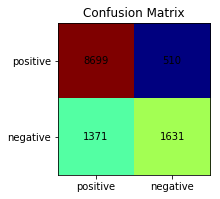

In [3]:
print "\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred)
conf_arr =confusion_matrix(y_test,y_pred)


norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

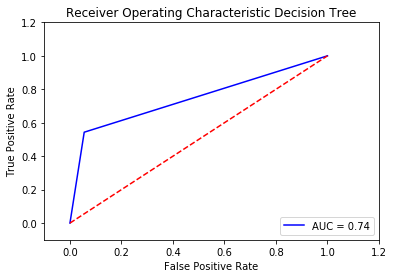

In [4]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [5]:
Gini_coefficient_gini=2*roc_auc - 1
print("Gini_coefficient of both the Decision Tree classifier models are\n")
print "Gini Index=",Gini_coefficient_gini

Gini_coefficient of both the Decision Tree classifier models are

Gini Index= 0.487923857762
